In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [33]:
df = pd.read_csv('homeprices.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


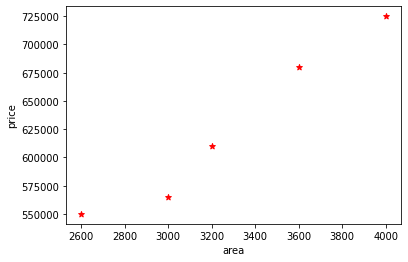

In [5]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area, df.price, color='red', marker='*')

In [6]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']], df.price)

LinearRegression()

In [7]:
reg.predict([[3300]])

/Users/manveerkaur/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [8]:
reg.coef_

array([135.78767123])

In [9]:
reg.intercept_

180616.43835616432

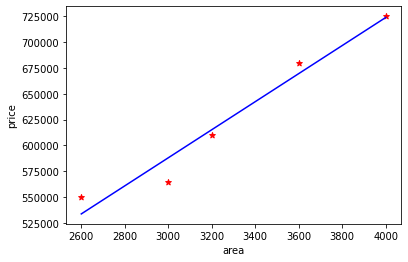

In [10]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area, df.price, color='red', marker='*')
plt.plot(df.area, reg.predict(df[['area']]), color='blue')

In [11]:
d2 = pd.read_csv('areas.csv')
d2

,area
0,6700
1,9000
2,6524
3,3600
4,4000
5,5000
6,1000
7,8000
8,8765
9,2357


In [12]:
prices_1=reg.predict(d2)

In [13]:
#adding new column prices to data frame
d2['prices']=prices_1
d2

,area,prices
0,6700,1.090394e+06
1,9000,1.402705e+06
2,6524,1.066495e+06
3,3600,6.694521e+05
4,4000,7.237671e+05
5,5000,8.595548e+05
6,1000,3.164041e+05
7,8000,1.266918e+06
8,8765,1.370795e+06
9,2357,5.006680e+05


In [14]:
d2.to_csv('predictions.csv', index=False)

In [15]:
# saving model and using it : can use pickle or joblib - joblib is better for large numpy arrays
import pickle

In [17]:
with open('model_pickle', 'wb') as f:
    pickle.dump(reg,f)
    # write model as binary file named model_pickle

In [18]:
#read the model from model_pickle and use to make predictions
with open('model_pickle', 'rb') as f:
    mp = pickle.load(f)

In [19]:
mp.predict([[5000]])

/Users/manveerkaur/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

In [22]:
#joblib
import joblib
joblib.dump(reg, 'model_jb')

['model_jb']

In [25]:
mj=joblib.load('model_jb')
mj

LinearRegression()

In [27]:
mj.predict([[5000]])

/Users/manveerkaur/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

In [30]:
#dummy variables
df3 =pd.read_csv('towns.csv')

In [36]:
dummies= pd.get_dummies(df3.town)
dummies

,abc,def,ghi
0,1,0,0
1,1,0,0
2,0,1,0
3,0,1,0
4,0,0,1


In [37]:
#merge two dataframes
merged = pd.concat([df,dummies], axis='columns')
merged

,area,price,abc,def,ghi
0,2600,550000,1,0,0
1,3000,565000,1,0,0
2,3200,610000,0,1,0
3,3600,680000,0,1,0
4,4000,725000,0,0,1


In [38]:
# dummy variable trap - when some variable can be derived from other variables, the vars are multi-co-linear. 
#One variable should be dropped to avoid multi co linearity which leads to dummy variable trap
final_df = merged.drop(['ghi'], axis = 'columns')
final_df

,area,price,abc,def
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,0,1
3,3600,680000,0,1
4,4000,725000,0,0
